In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib 
matplotlib.style.use('ggplot')

In [55]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
df.shape

(303, 14)

In [59]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [60]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [61]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

## Features Exploration

- **Age**: The patient's age. (Continuous)
- **Sex**: The patient's gender (0 for female, 1 for male). (Categorical)
- **Chest Pain Type (cp)**: (Categorical)
    - Value 0: Typical Angina 
    - Value 1: Atypical Angina 
    - Value 2: Non-Anginal Pain 
    - Value 3: Asymptomatic 
- **Resting Blood Pressure (trtbps)** : (Continuous)
- **Serum Cholesterol Levels (chol)** : (Continuous)
- **Fasting Blood Sugar (fbs)** : (Categorical)
    - Value 0: <= 120 mg/dL
    - Value 1: > 120 mg/dL
- **Resting ECG Results (restecg)** : (Categorical)
    - Value 0: Normal 
    - Value 1: ST-T Wave Abnormality 
    - Value 2: Probable or Definite Left Ventricular Hypertrophy 
- **Maximum Heart Rate During Exercise (thalachh)** : (Continuous)
- **Exercise-Induced Angina (exng)** : (Categorical)
     - Value 0: No
     - Value 1: Yes
- **ST-Segment Depression (oldpeak)** : (Continuous)
- **Slope of ST Segment (slp)** : (Categorical)
     - Value 0: Downsloping 
     - Value 1: Flat 
     - Value 2: Upsloping diagnosis.
- **Number of Major Vessels Colored by Fluoroscopy (caa)** : (Categorical)
- **Thalassemia Type (thall)** : (Categorical)
     - Value 0: None (Normal)
     - Value 1: Fixed Defect 
     - Value 2: Reversible Defect 
     - Value 3: Thalassemia 
- **Risk of Heart Attack (output)** : (Categorical)
     - Value 0: No
     - Value 1: Yes

In [62]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [63]:
df2 = df.copy()
mapping = {0: 'TA', 1: 'ATA', 2: 'NAP', 3: 'ASY'}
df2['cp'] = df2['cp'].replace(mapping)
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,ASY,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,NAP,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,ATA,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,ATA,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,TA,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
mapping = {0: 'Female', 1: 'Male'}
df2['sex'] = df2['sex'].replace(mapping)
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,ASY,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,NAP,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,ATA,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,ATA,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,TA,120,354,0,1,163,1,0.6,2,0,2,1


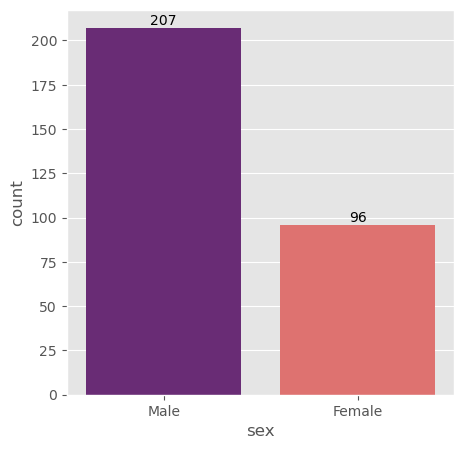

In [65]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df2, x='sex', palette='magma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

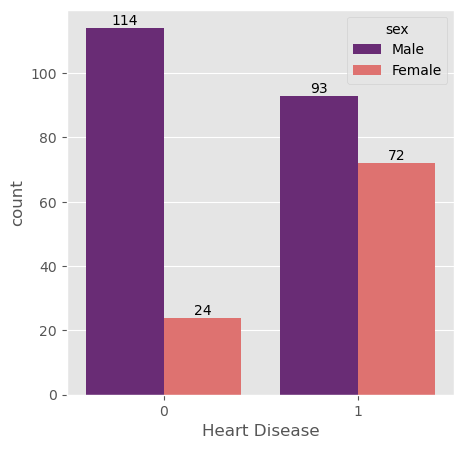

In [66]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df2, x='output', hue='sex', palette='magma')
    
for bars in ax.containers:
    ax.bar_label(bars)
    
ax.set_xlabel('Heart Disease')    
plt.show()    

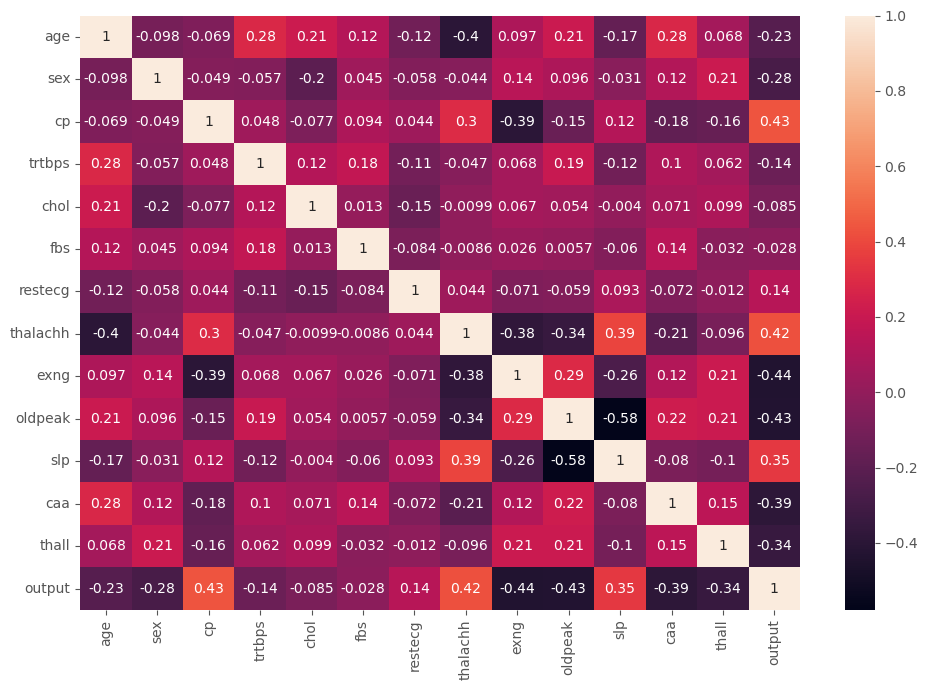

In [67]:
plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.show()

##### Chest Pain Type (cp), Maximum Heart Rate During Exercise (thalachh), Slope of ST Segment (slp) have the closest correlation to Output (Heart Failure) of 0.43, 0.43 and 0.35 respectively.

In [68]:
fig=px.histogram(df2,
                 x="cp",
                 color="sex",
                 hover_data=df2.columns,
                 title="Types of Chest Pain"
                )
fig.show()

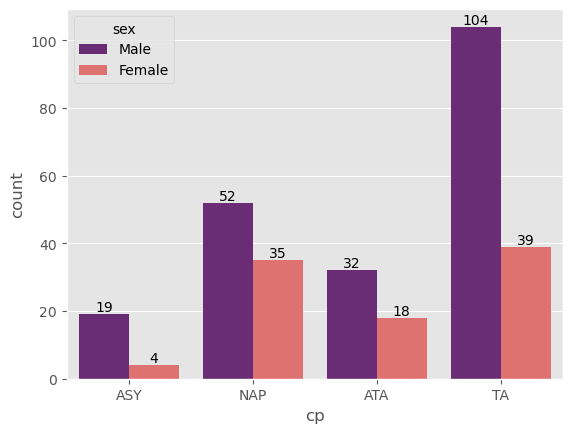

In [69]:
ax = sns.countplot(data=df2, x='cp', hue='sex', palette='magma')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()    

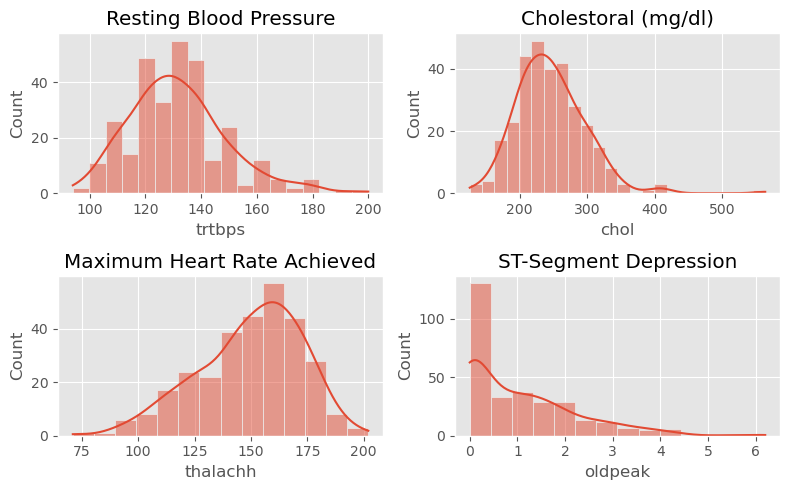

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(8,5))

sns.histplot(df['trtbps'],kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Resting Blood Pressure')


sns.histplot(df['chol'],kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Cholestoral (mg/dl)')


sns.histplot(df['thalachh'],kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Maximum Heart Rate Achieved')


sns.histplot(df['oldpeak'],kde=True, ax=axs[1, 1])
axs[1, 1].set_title('ST-Segment Depression')

plt.tight_layout()

plt.show()

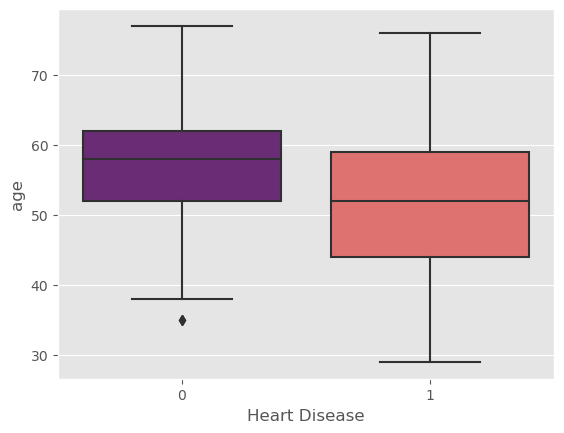

In [71]:
ax = sns.boxplot(data=df, x='output', y='age', palette='magma')
ax.set_xlabel('Heart Disease')    
plt.show()

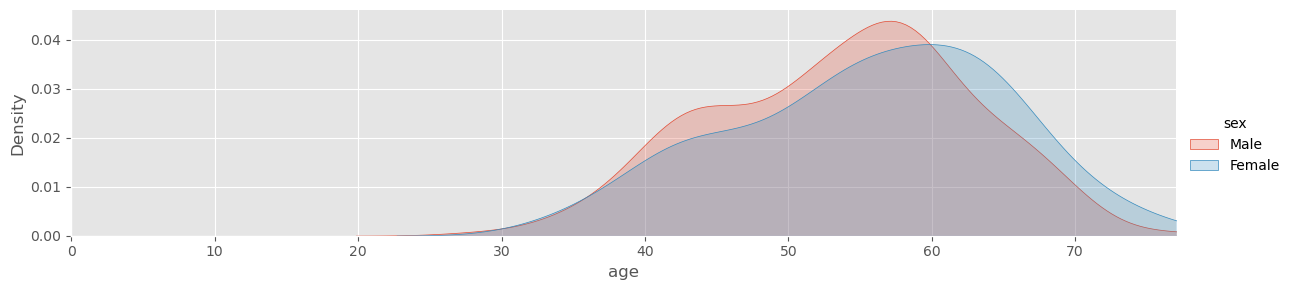

In [72]:
fig = sns.FacetGrid(df2, hue='sex', aspect=4)

fig.map(sns.kdeplot,'age',fill=True)

oldest = df2['age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

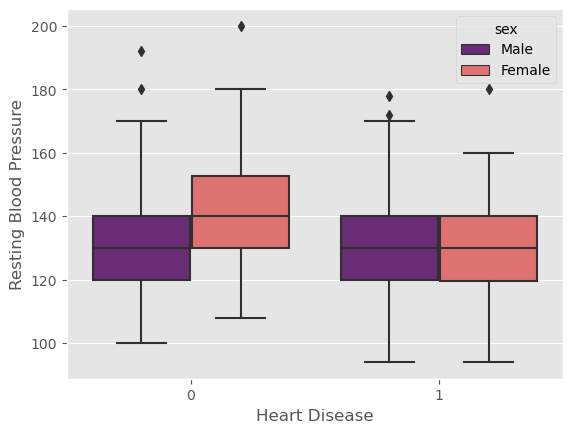

In [73]:
ax = sns.boxplot(x='output', y='trtbps', hue='sex', data=df2, palette='magma')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Resting Blood Pressure')
plt.show()

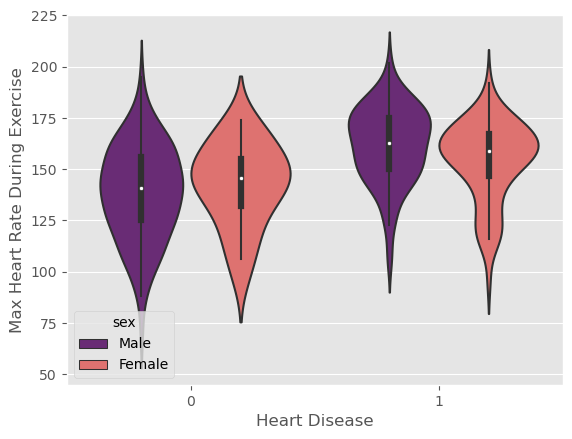

In [74]:
ax = sns.violinplot(x='output', y='thalachh', hue='sex', data=df2, palette='magma')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Max Heart Rate During Exercise')
plt.show()

In [75]:
X = df.drop(['output'],axis=1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [76]:
y = df.output
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = lr.score(X_test, y_test)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.80      0.94      0.87        35

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76

The model is providing 86.84 percent accurate result.


Text(33.22222222222222, 0.5, 'Actual')

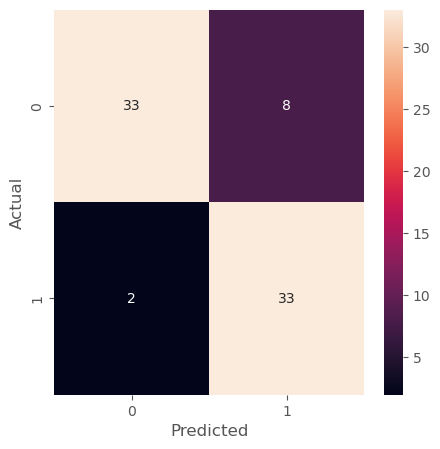

In [81]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [82]:
lr.predict([[57, 0, 0, 140, 241, 0, 1, 123, 1, 0.2, 1, 0, 3]])

array([0], dtype=int64)

In [83]:
lr.predict([[70, 0, 3, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]])

array([0], dtype=int64)

In [84]:
lr.predict([[44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3]])

array([0], dtype=int64)

In [85]:
feature_names = X.columns
feature_names

coefficients = lr.coef_[0]
absolute_coefficients = abs(coefficients)

sorted_indices = absolute_coefficients.argsort()[::-1]
sorted_coefficients = absolute_coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices] 

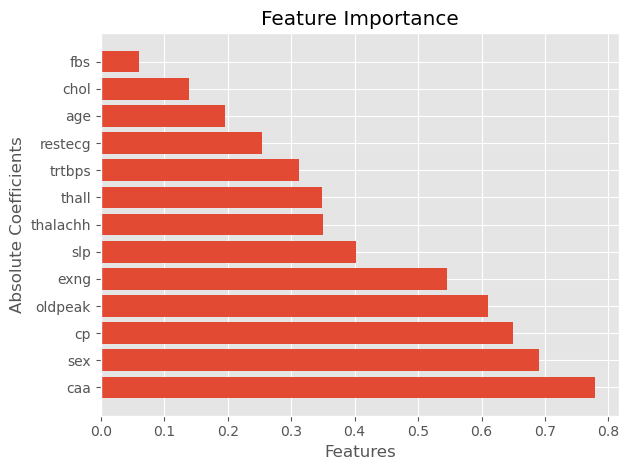

In [86]:
plt.barh(range(len(sorted_feature_names)), sorted_coefficients)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficients')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [87]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10)
    accuracy_rate.append(score.mean())

In [88]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

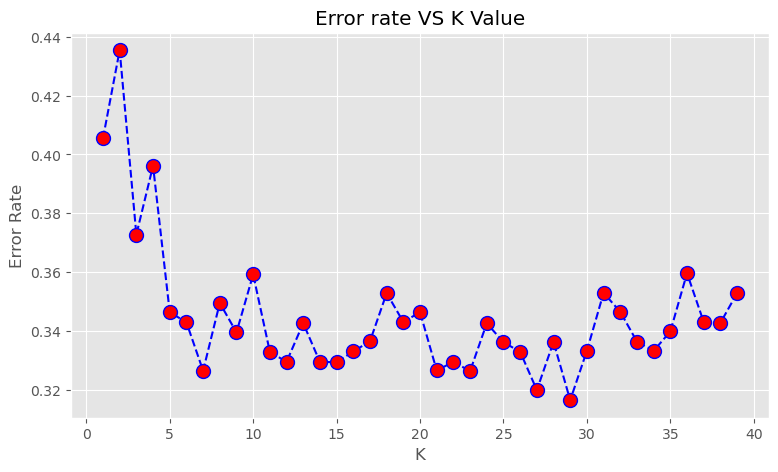

In [89]:
plt.figure(figsize=(9,5))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [90]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = knn.score(X_test, y_test)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

              precision    recall  f1-score   support

           0       0.97      0.71      0.82        41
           1       0.74      0.97      0.84        35

    accuracy                           0.83        76
   macro avg       0.85      0.84      0.83        76
weighted avg       0.86      0.83      0.83        76

The model is providing 82.89 percent accurate result.


In [91]:
knn.predict([[57, 0, 0, 140, 241, 0, 1, 123, 1, 0.2, 1, 0, 3]])

array([0], dtype=int64)

In [92]:
knn.predict([[40, 0, 3, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]])

array([1], dtype=int64)

In [93]:
knn.predict([[41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2]])

array([1], dtype=int64)

In [94]:
knn.predict([[44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3]])

array([0], dtype=int64)

In [95]:
knn.predict([[59, 1, 0, 164, 176, 1, 0, 90, 0, 1.0, 1, 2, 1]])

array([0], dtype=int64)

In [96]:
knn.predict([[64, 1, 3, 110, 211, 0, 0, 144, 1, 1.8, 1, 0, 2]])

array([1], dtype=int64)

Text(33.22222222222222, 0.5, 'Actual')

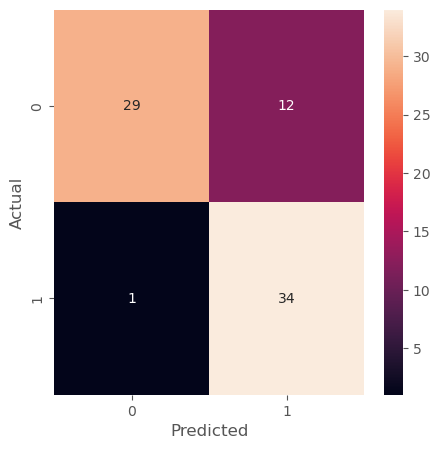

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [98]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = rf.score(X_test, y_test)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.76      0.80      0.78        35

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

The model is providing 78.95 percent accurate result.


In [99]:
rf.predict([[57, 0, 0, 140, 241, 0, 1, 123, 1, 0.2, 1, 0, 3]])

array([0], dtype=int64)

In [100]:
rf.predict([[70, 0, 3, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]])

array([0], dtype=int64)

In [101]:
rf.predict([[44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3]])

array([1], dtype=int64)

In [102]:
rf.predict([[59, 1, 0, 164, 176, 1, 0, 90, 0, 1.0, 1, 2, 1]])

array([0], dtype=int64)

In [103]:
rf.predict([[64, 1, 3, 110, 211, 0, 0, 144, 1, 1.8, 1, 0, 2]])

array([0], dtype=int64)

In [104]:
rf.predict([[56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2]])

array([1], dtype=int64)

Text(33.22222222222222, 0.5, 'Actual')

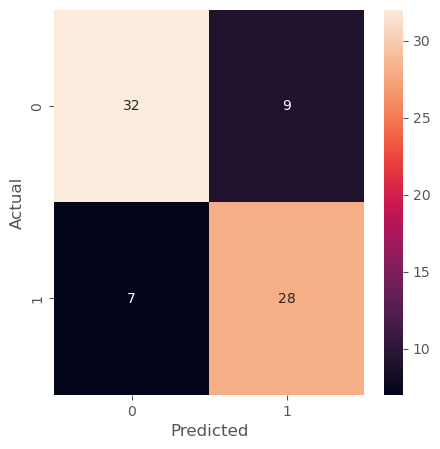

In [105]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')

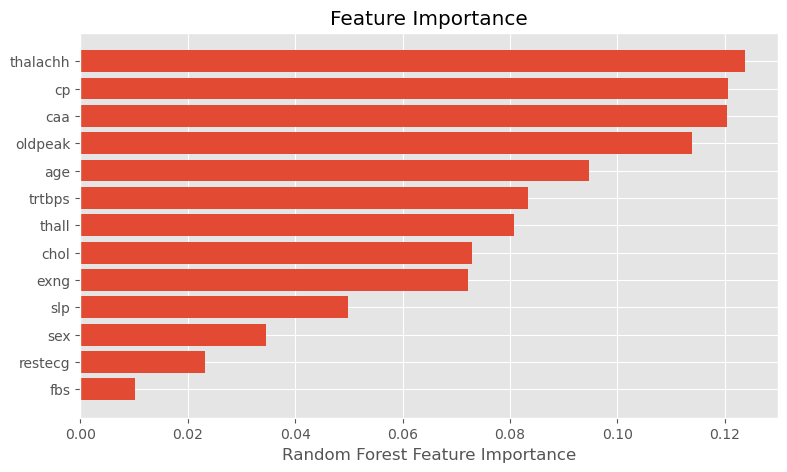

In [106]:
plt.figure(figsize=(9,5))
importance = rf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_names[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()